In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from generate_data import generate_Ls, generate_sylvester_data
from proximal_gradient_descent import (
    get_optimizer_oracles,
    proximal_accelerated_gradient,
    project_to_lower_with_positive_diag,
    warm_start
)
from plotting_utilities import get_metrics, patternify_Ls, one_example_prs
from sklearn.metrics import precision_score, recall_score, matthews_corrcoef, auc
import pickle

# Prevent Type 3 fonts
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [12]:
np.random.seed(0)
dims = (100, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoregs = np.logspace(0.2, -2, 200) # (50, 50)
#Lss, _ = warm_start(X, L_init, glassoregs=glassoregs, dont_warm_start=True, verbose=True, max_iter=1000)
#Lss_lgam, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={0}, dont_warm_start=True, max_iter=1000, verbose=True)
Lss_lgam2, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={1}, dont_warm_start=True, max_iter=1000, verbose=True)

L1 Param: 1.5848931924611136
L1 Param: 1.5450577742743616


KeyboardInterrupt: 

In [19]:
np.random.seed(0)
dims = (40, 40, 40)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True)

L_init = [np.eye(d) for d in dims]

frobreg = 1/np.prod(dims)**(1/len(dims))
glassoregs = np.logspace(0.5, -2, 20) # (50, 50)
Lss, _ = warm_start(X, L_init, glassoregs=glassoregs, dont_warm_start=True, verbose=True, max_iter=1000)
Lss_lgam, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={0, 1}, dont_warm_start=True, max_iter=1000, verbose=True)

L1 Param: 3.1622776601683795


/Users/baileyandrew/Cartesian-LGAM/proximal_gradient_descent.py:43: UserWarning: Alpha too small, stopping line search
  warnings.warn("Alpha too small, stopping line search")


L1 Param: 2.3357214690901227
L1 Param: 1.7252105499420407
L1 Param: 1.2742749857031337
L1 Param: 0.9412049672680668
L1 Param: 0.6951927961775607
L1 Param: 0.5134832907437552
L1 Param: 0.37926901907322497
L1 Param: 0.2801356761198869
L1 Param: 0.20691380811147903
L1 Param: 0.15283067326587696
L1 Param: 0.11288378916846895
L1 Param: 0.08337822234717891
L1 Param: 0.06158482110660264
L1 Param: 0.04548777947003778
L1 Param: 0.033598182862837826
L1 Param: 0.024816289228368264
L1 Param: 0.018329807108324356
L1 Param: 0.013538761800225447
L1 Param: 0.01
L1 Param: 3.1622776601683795
L1 Param: 2.3357214690901227
L1 Param: 1.7252105499420407
L1 Param: 1.2742749857031337
L1 Param: 0.9412049672680668
L1 Param: 0.6951927961775607
L1 Param: 0.5134832907437552
L1 Param: 0.37926901907322497
L1 Param: 0.2801356761198869
L1 Param: 0.20691380811147903
L1 Param: 0.15283067326587696
L1 Param: 0.11288378916846895
L1 Param: 0.08337822234717891
L1 Param: 0.06158482110660264
L1 Param: 0.04548777947003778
L1 Par

/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:79: RuntimeWarning: invalid value encountered in divide
  precs = [TPs[i] / (TPs[i] + FPs[i]) for i in range(len(dims))]
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:86: RuntimeWarning: invalid value encountered in divide
  (TPs[i]*TNs[i] - FPs[i]*FNs[i])


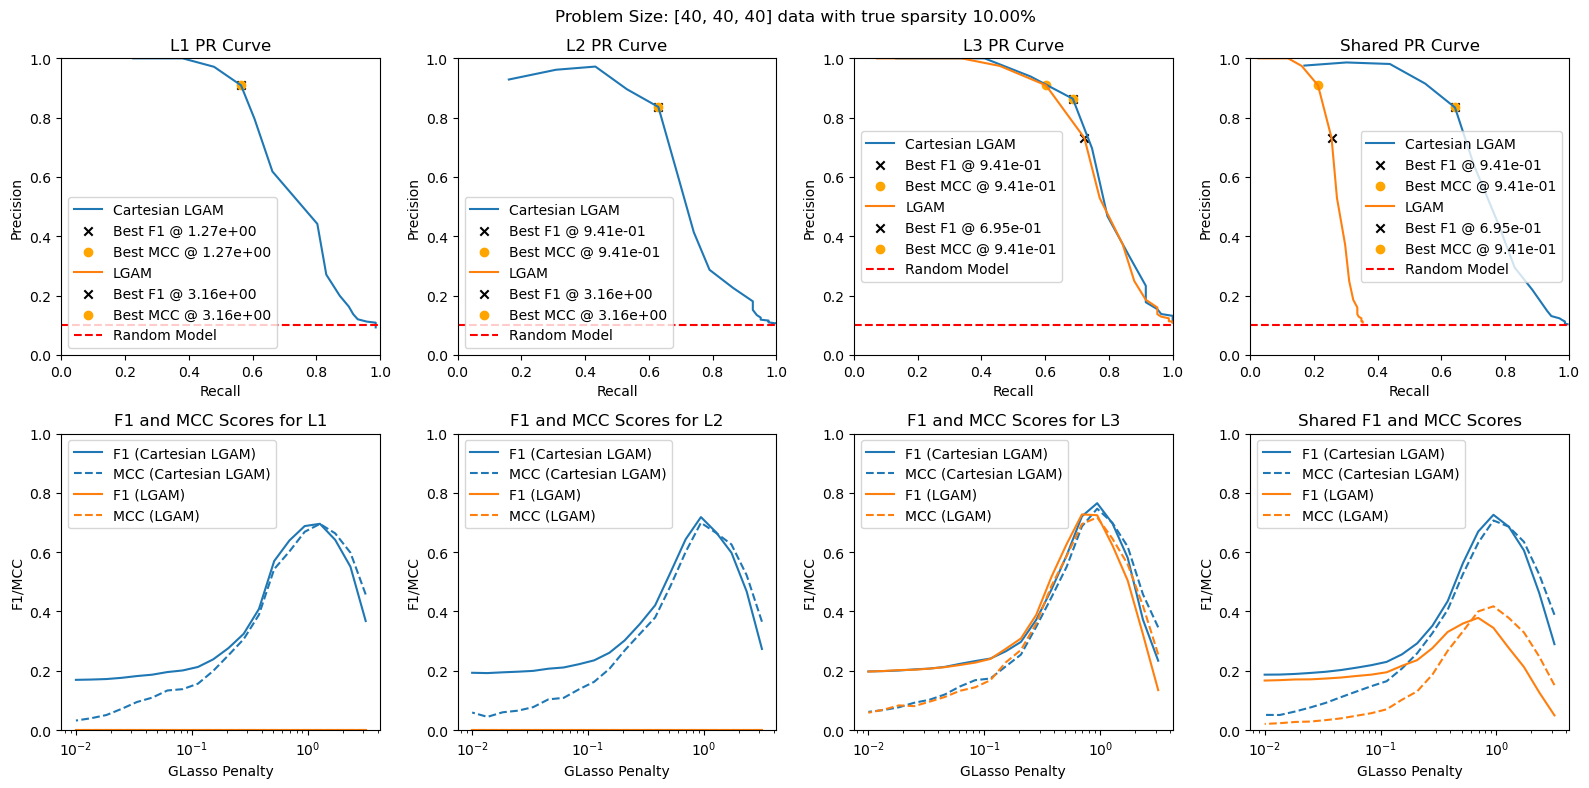

In [20]:
L_estim_patterns = patternify_Ls(Lss)
L_lgam_estim_patterns = patternify_Ls(Lss_lgam)

one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam,
    glassoregs=glassoregs,
    sparsity=sparsity,
)
pass

In [28]:
np.random.seed(0)
dims = (50, 50)
sparsity = 0.1
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True)

L_init = [np.eye(d) for d in dims]

glassoregs = np.logspace(0.5, -2, 20) # (50, 50)
Lss, _ = warm_start(X, L_init, glassoregs=glassoregs, dont_warm_start=True, verbose=True, max_iter=1000, frobreg=0)
Lss_lgam, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={0}, dont_warm_start=True, max_iter=1000, verbose=True, frobreg=0)

L1 Param: 3.1622776601683795
L1 Param: 2.3357214690901227
L1 Param: 1.7252105499420407
L1 Param: 1.2742749857031337
L1 Param: 0.9412049672680668
L1 Param: 0.6951927961775607
L1 Param: 0.5134832907437552


/Users/baileyandrew/Cartesian-LGAM/proximal_gradient_descent.py:43: UserWarning: Alpha too small, stopping line search
  warnings.warn("Alpha too small, stopping line search")


L1 Param: 0.37926901907322497
L1 Param: 0.2801356761198869
L1 Param: 0.20691380811147903
L1 Param: 0.15283067326587696
L1 Param: 0.11288378916846895
L1 Param: 0.08337822234717891
L1 Param: 0.06158482110660264
L1 Param: 0.04548777947003778
L1 Param: 0.033598182862837826
L1 Param: 0.024816289228368264
L1 Param: 0.018329807108324356
L1 Param: 0.013538761800225447
L1 Param: 0.01
L1 Param: 3.1622776601683795
L1 Param: 2.3357214690901227
L1 Param: 1.7252105499420407
L1 Param: 1.2742749857031337
L1 Param: 0.9412049672680668
L1 Param: 0.6951927961775607
L1 Param: 0.5134832907437552
L1 Param: 0.37926901907322497
L1 Param: 0.2801356761198869
L1 Param: 0.20691380811147903
L1 Param: 0.15283067326587696
L1 Param: 0.11288378916846895
L1 Param: 0.08337822234717891
L1 Param: 0.06158482110660264
L1 Param: 0.04548777947003778
L1 Param: 0.033598182862837826
L1 Param: 0.024816289228368264
L1 Param: 0.018329807108324356
L1 Param: 0.013538761800225447
L1 Param: 0.01


/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:79: RuntimeWarning: invalid value encountered in divide
  precs = [TPs[i] / (TPs[i] + FPs[i]) for i in range(len(dims))]
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:80: RuntimeWarning: invalid value encountered in divide
  shared_precs = shared_TPs / (shared_TPs + shared_FPs)
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:86: RuntimeWarning: invalid value encountered in divide
  (TPs[i]*TNs[i] - FPs[i]*FNs[i])
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:97: RuntimeWarning: invalid value encountered in divide
  (shared_TPs * shared_TNs - shared_FPs * shared_FNs)


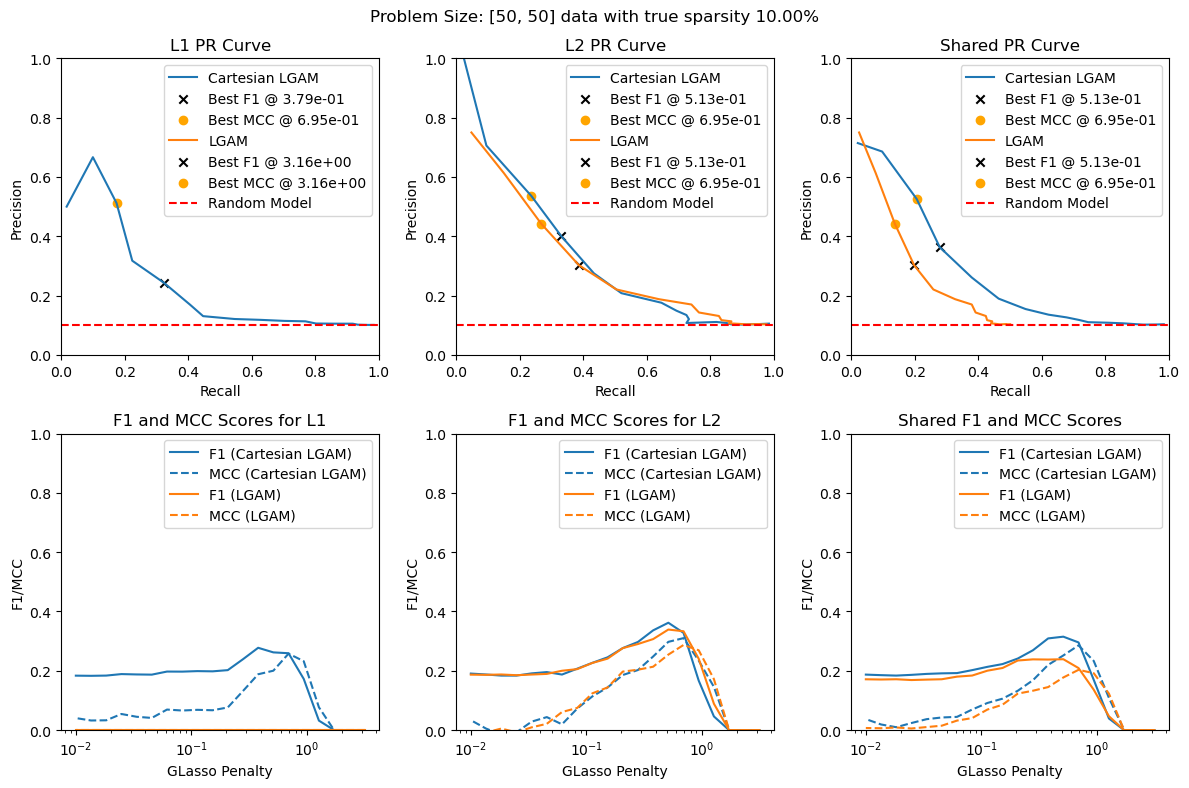

In [29]:
L_estim_patterns = patternify_Ls(Lss)
L_lgam_estim_patterns = patternify_Ls(Lss_lgam)

one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam,
    glassoregs=glassoregs,
    sparsity=sparsity,
)
pass

In [42]:
np.random.seed(0)
dims = (30, 30)
sparsity = 0.3
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True)

L_init = [np.eye(d) for d in dims]

glassoregs = np.logspace(0.5, -2, 20) # (50, 50)
Lss, _ = warm_start(X, L_init, glassoregs=glassoregs, dont_warm_start=True, verbose=True, max_iter=1000, frobreg=0)
Lss_lgam, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={0}, dont_warm_start=True, max_iter=1000, verbose=True, frobreg=0)

L1 Param: 3.1622776601683795
L1 Param: 2.3357214690901227
L1 Param: 1.7252105499420407
L1 Param: 1.2742749857031337
L1 Param: 0.9412049672680668
L1 Param: 0.6951927961775607
L1 Param: 0.5134832907437552
L1 Param: 0.37926901907322497
L1 Param: 0.2801356761198869
L1 Param: 0.20691380811147903
L1 Param: 0.15283067326587696
L1 Param: 0.11288378916846895
L1 Param: 0.08337822234717891
L1 Param: 0.06158482110660264
L1 Param: 0.04548777947003778
L1 Param: 0.033598182862837826
L1 Param: 0.024816289228368264
L1 Param: 0.018329807108324356
L1 Param: 0.013538761800225447
L1 Param: 0.01
L1 Param: 3.1622776601683795
L1 Param: 2.3357214690901227
L1 Param: 1.7252105499420407
L1 Param: 1.2742749857031337
L1 Param: 0.9412049672680668
L1 Param: 0.6951927961775607
L1 Param: 0.5134832907437552
L1 Param: 0.37926901907322497
L1 Param: 0.2801356761198869
L1 Param: 0.20691380811147903
L1 Param: 0.15283067326587696
L1 Param: 0.11288378916846895
L1 Param: 0.08337822234717891
L1 Param: 0.06158482110660264
L1 Para

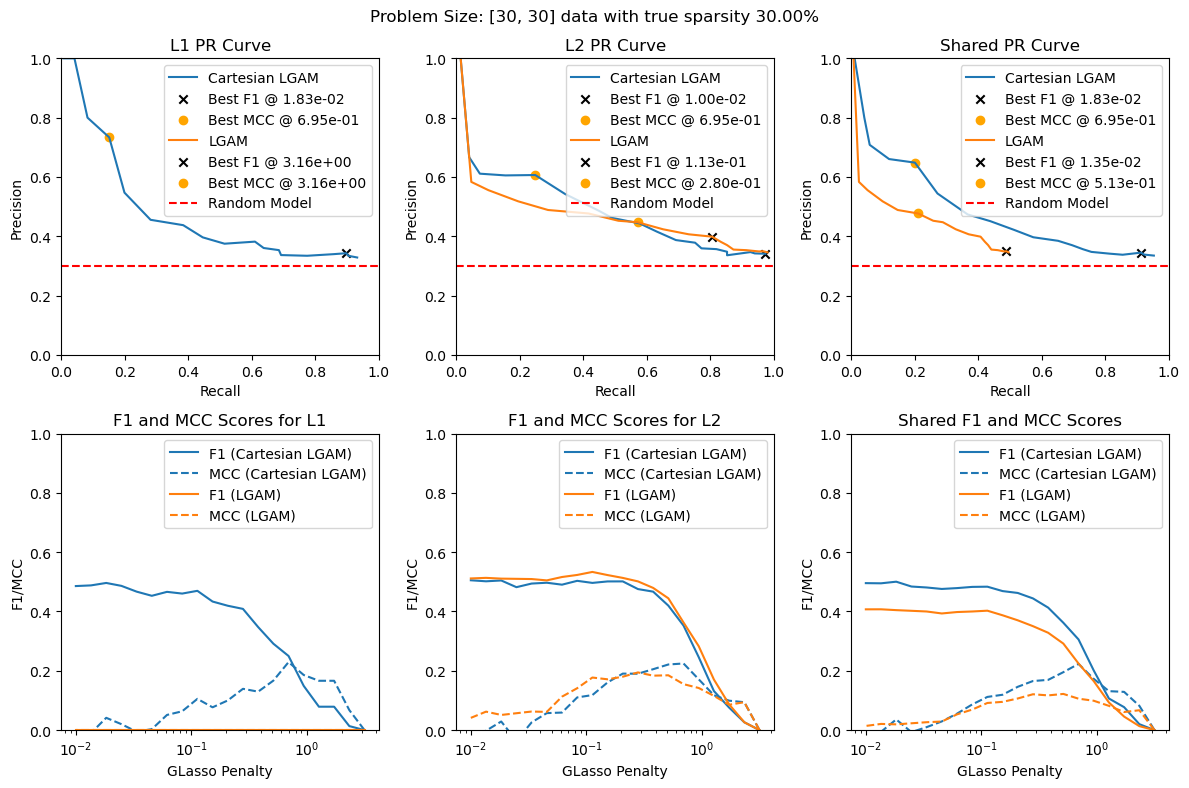

In [43]:
L_estim_patterns = patternify_Ls(Lss)
L_lgam_estim_patterns = patternify_Ls(Lss_lgam)

one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam,
    glassoregs=glassoregs,
    sparsity=sparsity,
)
pass

In [44]:
np.random.seed(0)
dims = (30, 35)
sparsity = 0.3
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True)

L_init = [np.eye(d) for d in dims]

glassoregs = np.logspace(0.5, -2, 20) # (50, 50)
Lss, _ = warm_start(X, L_init, glassoregs=glassoregs, dont_warm_start=True, verbose=True, max_iter=1000, frobreg=0)
Lss_lgam, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={0}, dont_warm_start=True, max_iter=1000, verbose=True, frobreg=0)

L1 Param: 3.1622776601683795
L1 Param: 2.3357214690901227
L1 Param: 1.7252105499420407
L1 Param: 1.2742749857031337
L1 Param: 0.9412049672680668
L1 Param: 0.6951927961775607
L1 Param: 0.5134832907437552
L1 Param: 0.37926901907322497
L1 Param: 0.2801356761198869
L1 Param: 0.20691380811147903
L1 Param: 0.15283067326587696
L1 Param: 0.11288378916846895
L1 Param: 0.08337822234717891
L1 Param: 0.06158482110660264
L1 Param: 0.04548777947003778
L1 Param: 0.033598182862837826
L1 Param: 0.024816289228368264
L1 Param: 0.018329807108324356
L1 Param: 0.013538761800225447
L1 Param: 0.01
L1 Param: 3.1622776601683795
L1 Param: 2.3357214690901227
L1 Param: 1.7252105499420407
L1 Param: 1.2742749857031337
L1 Param: 0.9412049672680668
L1 Param: 0.6951927961775607
L1 Param: 0.5134832907437552
L1 Param: 0.37926901907322497
L1 Param: 0.2801356761198869
L1 Param: 0.20691380811147903
L1 Param: 0.15283067326587696
L1 Param: 0.11288378916846895
L1 Param: 0.08337822234717891
L1 Param: 0.06158482110660264
L1 Para

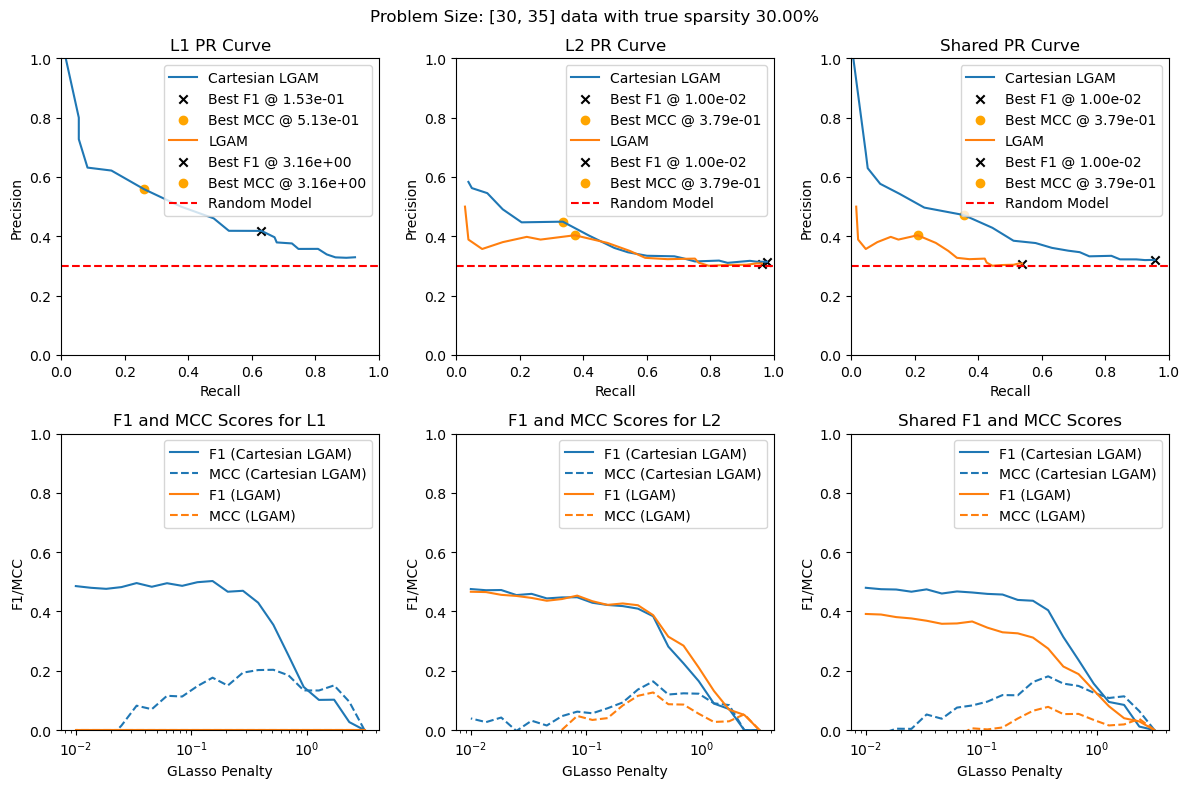

In [45]:
L_estim_patterns = patternify_Ls(Lss)
L_lgam_estim_patterns = patternify_Ls(Lss_lgam)

one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam,
    glassoregs=glassoregs,
    sparsity=sparsity,
)
pass

In [46]:
np.random.seed(0)
dims = (30, int(30 * (1+np.sqrt(2)))+1)
sparsity = 0.3
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True)

L_init = [np.eye(d) for d in dims]

glassoregs = np.logspace(0.5, -2, 20) # (50, 50)
Lss, _ = warm_start(X, L_init, glassoregs=glassoregs, dont_warm_start=True, verbose=True, max_iter=1000, frobreg=0)
Lss_lgam, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={0}, dont_warm_start=True, max_iter=1000, verbose=True, frobreg=0)

L1 Param: 3.1622776601683795


/Users/baileyandrew/Cartesian-LGAM/proximal_gradient_descent.py:43: UserWarning: Alpha too small, stopping line search
  warnings.warn("Alpha too small, stopping line search")


L1 Param: 2.3357214690901227
L1 Param: 1.7252105499420407
L1 Param: 1.2742749857031337
L1 Param: 0.9412049672680668
L1 Param: 0.6951927961775607
L1 Param: 0.5134832907437552
L1 Param: 0.37926901907322497
L1 Param: 0.2801356761198869
L1 Param: 0.20691380811147903
L1 Param: 0.15283067326587696
L1 Param: 0.11288378916846895
L1 Param: 0.08337822234717891
L1 Param: 0.06158482110660264
L1 Param: 0.04548777947003778
L1 Param: 0.033598182862837826
L1 Param: 0.024816289228368264
L1 Param: 0.018329807108324356
L1 Param: 0.013538761800225447
L1 Param: 0.01
L1 Param: 3.1622776601683795
L1 Param: 2.3357214690901227
L1 Param: 1.7252105499420407
L1 Param: 1.2742749857031337
L1 Param: 0.9412049672680668
L1 Param: 0.6951927961775607
L1 Param: 0.5134832907437552
L1 Param: 0.37926901907322497
L1 Param: 0.2801356761198869
L1 Param: 0.20691380811147903
L1 Param: 0.15283067326587696
L1 Param: 0.11288378916846895
L1 Param: 0.08337822234717891
L1 Param: 0.06158482110660264
L1 Param: 0.04548777947003778
L1 Par

/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:79: RuntimeWarning: invalid value encountered in divide
  precs = [TPs[i] / (TPs[i] + FPs[i]) for i in range(len(dims))]
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:86: RuntimeWarning: invalid value encountered in divide
  (TPs[i]*TNs[i] - FPs[i]*FNs[i])


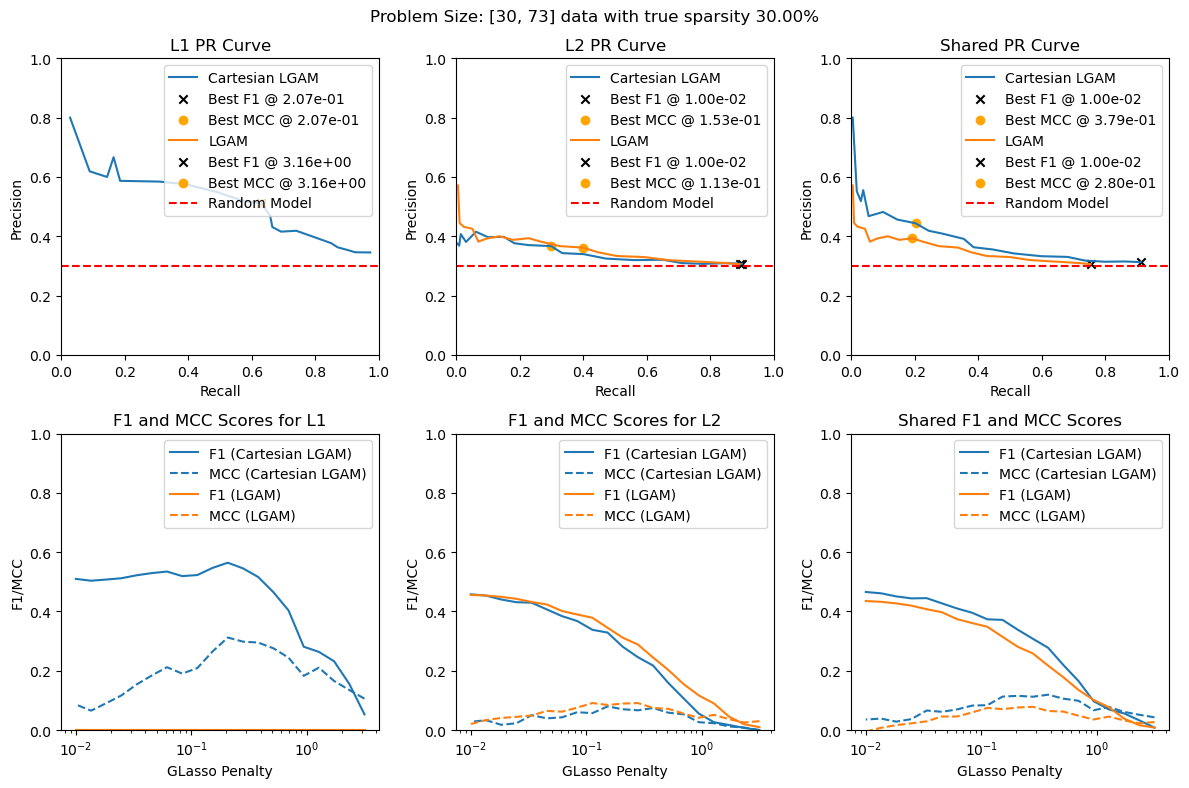

In [47]:
L_estim_patterns = patternify_Ls(Lss)
L_lgam_estim_patterns = patternify_Ls(Lss_lgam)

one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam,
    glassoregs=glassoregs,
    sparsity=sparsity,
)
pass

In [3]:
np.random.seed(0)
dims = (30, 200)
sparsity = 0.3
Ls, L_patterns = generate_Ls(dims, sparsity=sparsity)
X = generate_sylvester_data(Ls, normalize=True)

L_init = [np.eye(d) for d in dims]

glassoregs = np.logspace(0.5, -2, 20) # (50, 50)
Lss, _ = warm_start(X, L_init, glassoregs=glassoregs, dont_warm_start=True, verbose=True, max_iter=1000, frobreg=0)
Lss_lgam, _ = warm_start(X, L_init, glassoregs=glassoregs, sample_axes={0}, dont_warm_start=True, max_iter=1000, verbose=True, frobreg=0)

L1 Param: 3.1622776601683795


/Users/baileyandrew/Cartesian-LGAM/proximal_gradient_descent.py:43: UserWarning: Alpha too small, stopping line search
  warnings.warn("Alpha too small, stopping line search")


L1 Param: 2.3357214690901227
L1 Param: 1.7252105499420407
L1 Param: 1.2742749857031337
L1 Param: 0.9412049672680668
L1 Param: 0.6951927961775607
L1 Param: 0.5134832907437552
L1 Param: 0.37926901907322497
L1 Param: 0.2801356761198869
L1 Param: 0.20691380811147903
L1 Param: 0.15283067326587696
L1 Param: 0.11288378916846895
L1 Param: 0.08337822234717891
L1 Param: 0.06158482110660264
L1 Param: 0.04548777947003778
L1 Param: 0.033598182862837826
L1 Param: 0.024816289228368264
L1 Param: 0.018329807108324356
L1 Param: 0.013538761800225447
L1 Param: 0.01
L1 Param: 3.1622776601683795
L1 Param: 2.3357214690901227
L1 Param: 1.7252105499420407
L1 Param: 1.2742749857031337
L1 Param: 0.9412049672680668
L1 Param: 0.6951927961775607
L1 Param: 0.5134832907437552
L1 Param: 0.37926901907322497
L1 Param: 0.2801356761198869
L1 Param: 0.20691380811147903
L1 Param: 0.15283067326587696
L1 Param: 0.11288378916846895
L1 Param: 0.08337822234717891
L1 Param: 0.06158482110660264
L1 Param: 0.04548777947003778
L1 Par

/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:79: RuntimeWarning: invalid value encountered in divide
  precs = [TPs[i] / (TPs[i] + FPs[i]) for i in range(len(dims))]
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:80: RuntimeWarning: invalid value encountered in divide
  shared_precs = shared_TPs / (shared_TPs + shared_FPs)
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:84: RuntimeWarning: invalid value encountered in divide
  f1s = [2*precs[i]*recs[i]/(precs[i]+recs[i]) for i in range(len(dims))]
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:86: RuntimeWarning: invalid value encountered in divide
  (TPs[i]*TNs[i] - FPs[i]*FNs[i])
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:94: RuntimeWarning: invalid value encountered in divide
  shared_f1s =  2 * (shared_precs * shared_recs)/(shared_precs + shared_recs)
/Users/baileyandrew/Cartesian-LGAM/plotting_utilities.py:97: RuntimeWarning: invalid value encountered in divide
  (shared_TPs *

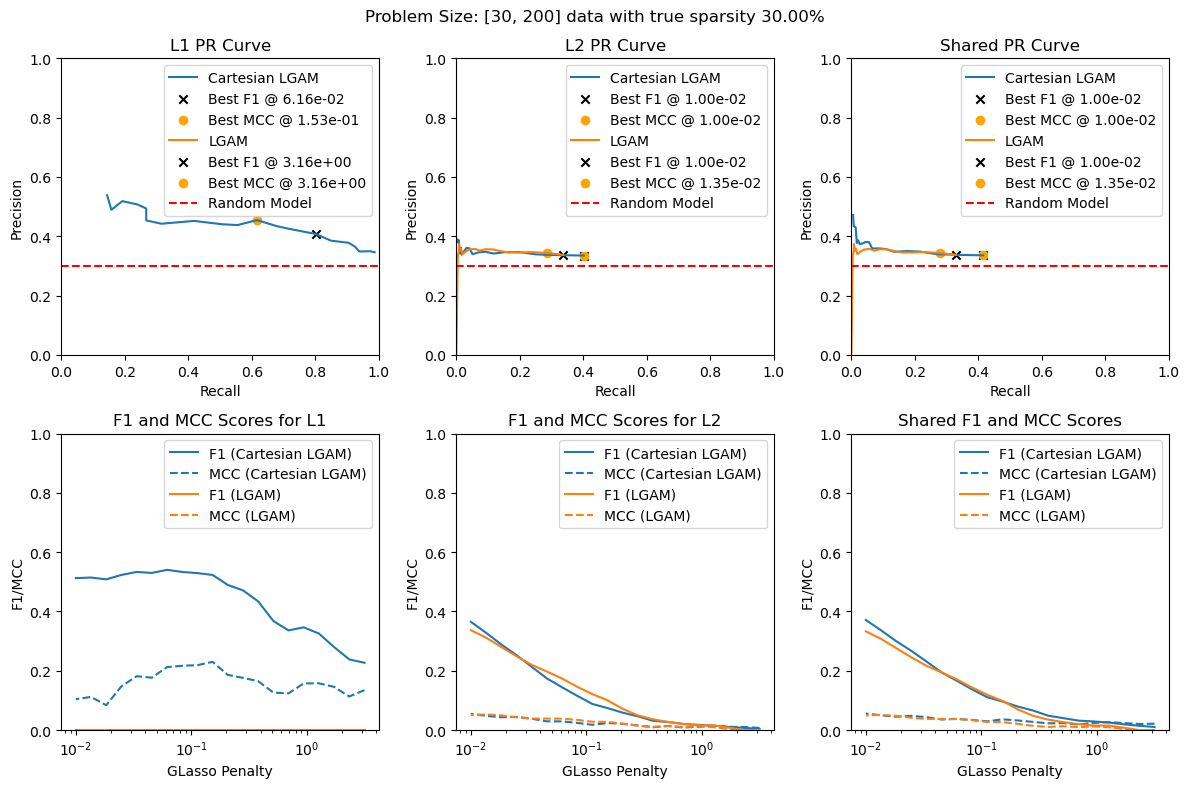

In [4]:
L_estim_patterns = patternify_Ls(Lss)
L_lgam_estim_patterns = patternify_Ls(Lss_lgam)

one_example_prs(
    L_patterns=L_patterns,
    Lss=Lss,
    Lss_lgam=Lss_lgam,
    glassoregs=glassoregs,
    sparsity=sparsity,
)
pass